<a href="https://colab.research.google.com/github/JianHMai/Taxi-Tips-Prediction/blob/SVR/CPE695_Project_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv("TaxiTrip2021Subset.csv")

train = data.sample(frac=0.8)
test = data.drop(train.index).sample(frac=1.0)

In [142]:
trainX = train[['Trip Seconds', 'Trip Miles', 'Fare']]
trainY = train['Tips']
testX = test[['Trip Seconds', 'Trip Miles', 'Fare']]
testY = test['Tips']

In [143]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [144]:
svr_clf = make_pipeline(StandardScaler(), SVR())
svr_clf.fit(trainX, trainY)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [145]:
svr_predY = svr_clf.predict(testX)
result = pd.DataFrame({"Fare": testX['Fare'], "Y Tips": testY, "Predicted": np.round(svr_predY,2)})
result

,Fare,Y Tips,Predicted
6622,31.00,0.0,0.06
5050,7.50,2.0,0.10
3387,30.00,0.0,0.06
8948,10.50,0.0,0.10
25,7.50,0.0,0.10
...,...,...,...
5309,29.25,0.0,0.08
7373,9.00,0.0,0.10
6217,21.25,0.0,0.10
2540,16.00,0.0,0.10


In [146]:
rmse = mean_squared_error(testY, svr_predY, squared=False)
print("RMSE: " + "{:.2f}".format(rmse))

RMSE: 3.21


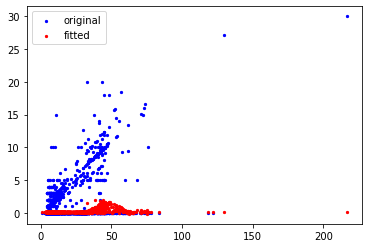

In [149]:
plt.scatter(testX['Fare'], testY, s=5, color="blue", label="original")
plt.scatter(testX['Fare'], svr_predY, s=5, color="red", label="fitted")
plt.legend()
plt.show()